In [2]:
import numpy as np
from matplotlib import pyplot as plt
from functools import partial
%matplotlib inline

# Função

$$f(x) = \frac{1}{x}$$

In [111]:
f = lambda x: 1 / x

In [112]:
x = np.linspace(0, 1, 100)[1:] # remove o 0

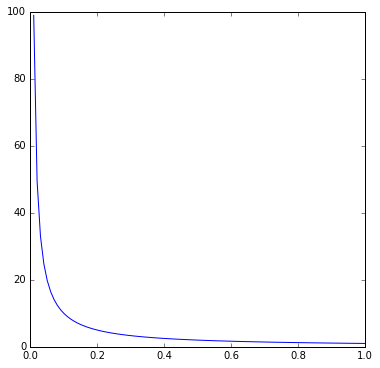

In [65]:
fig = plt.figure(figsize=(6, 6))
plt.plot(x, f(x))

# Derivada

$$f^{'}(x) = -\frac{1}{x^2}$$

# Função da reta tangente ao ponto (x0, y0)

$$y - y_0 = -\frac{1}{x_0^2}(x - x_0)$$
$$y = -\frac{1}{x_0^2}(x - x_0) + \frac{1}{x_0}$$

In [114]:
f_tan_x0 = lambda x, x0: -1*(1 / x0**2)*(x - x0) + 1 / x0

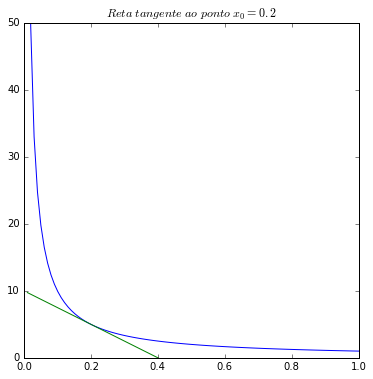

In [51]:
fig = plt.figure(figsize=(6, 6))
plt.plot(x, y)
plt.plot(x, f_tan_x0(x, .2))
plt.ylim([0, 50])
plt.title("$Reta\ tangente\ ao\ ponto\ x_0 = 0.2$")

# Retas tangentes a vários pontos

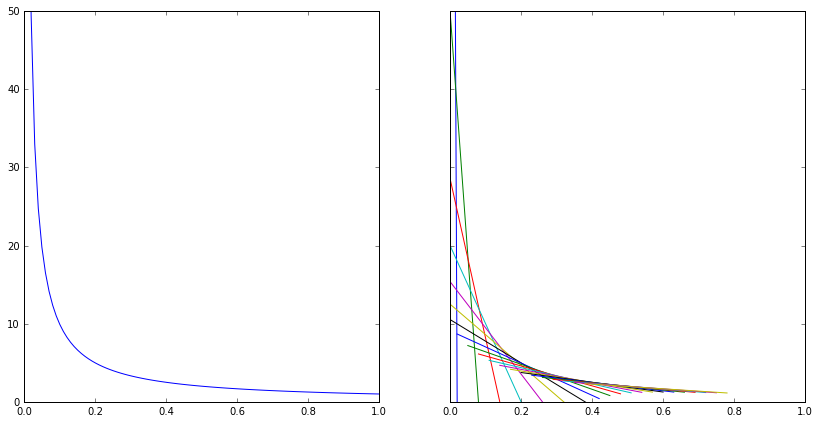

In [117]:
x0s = np.arange(.01, .6, .03)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 7))

plt.ylim([0, 50])
plt.xlim([0, 1])

ax1.plot(x, f(x))

for x0 in x0s:
    
    x_ = np.linspace(x0 - .2, x0 + .2, 10)
    ax2.plot(x_, f_tan_x0(x_, x0))

# Função

$$f(x) = x^n$$

In [3]:
f_n = lambda x, n: x**n

In [4]:
x = np.linspace(-5, 5, 200)

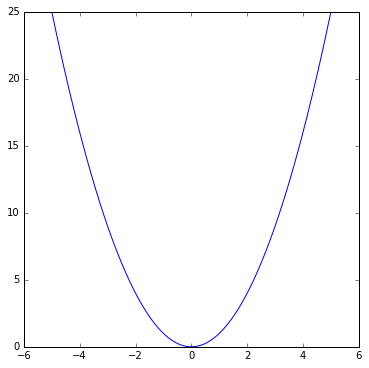

In [93]:
fig = plt.figure(figsize=(6, 6))

plt.plot(x, f_n(x, 2))

# Derivada

$$f^{'}(x) = nx^{n-1}$$

# Função da reta tangente ao ponto (x0, y0)

$$y - y0 = nx_0^{n-1}(x - x_0)$$
$$y = nx_0^{n-1}(x - x_0) + x_0^{n}$$

In [5]:
f_n_tan_x0 = lambda x, x0, n: n * (x0 ** (n - 1)) * (x - x0) + x0 ** n 

## n = 3, x0 = 1

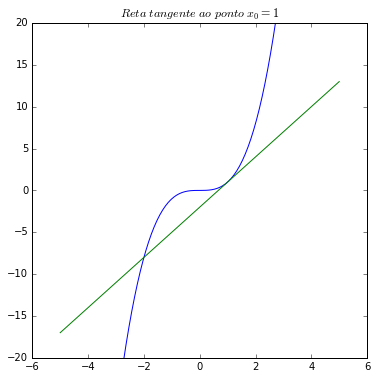

In [100]:
fig = plt.figure(figsize=(6, 6))
plt.plot(x, f_n(x, n=3))
plt.plot(x, f_n_tan_x0(x, x0=1, n=3))
plt.ylim([-20, 20])
plt.title("$Reta\ tangente\ ao\ ponto\ x_0 = 1$")

# Retas tangentes a vários pontos

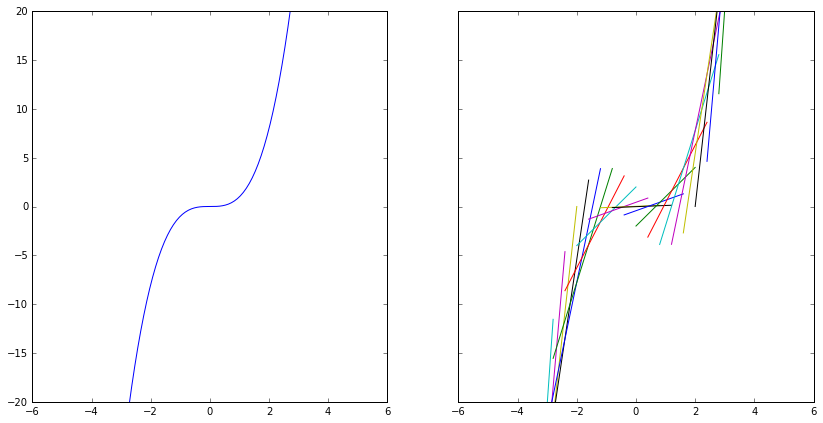

In [27]:
x0s = np.arange(-5, 5, .4)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 7))

plt.ylim([-20, 20])

ax1.plot(x, f_n(x, n=3))

for x0 in x0s:
    
    x_ = np.linspace(x0 - 1, x0 + 1, 20)
    ax2.plot(x_, f_n_tan_x0(x_, x0, n=3))

# Generalizando

In [23]:
def plot_derivative(f, fd, xlim, ylim, n_retas, **fparams):
    
    x = np.linspace(xlim[0], xlim[1], 100)
    x0s = np.linspace(xlim[0], xlim[1], n_retas)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(14, 7))
    
    plt.ylim(ylim)
    
    ax1.plot(x, f(x, **fparams))
    
    a_ = (xlim[1] - xlim[0]) / 10
    
    for x0 in x0s:
        
        x_ = np.linspace(x0 - a_, x0 + a_, 20)
        ax2.plot(x_, fd(x_, x0, **fparams))

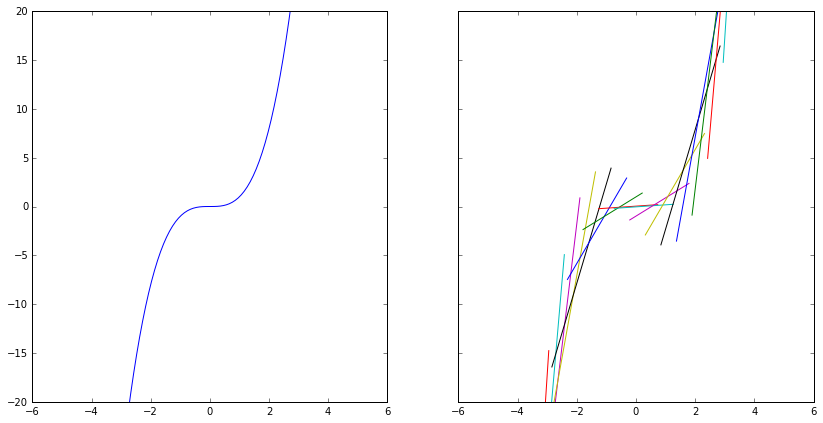

In [24]:
plot_derivative(f_n, f_n_tan_x0, (-5, 5), (-20, 20), n_retas = 20, n=3)

$$f(x) = 2x^2 + 4x + 3$$
$$fd(x, x0) = -4x_0^2 + 4x + 6x_0x + 3$$

In [18]:
f = lambda x: 2*x**2 + 4*x + 3
fd = lambda x, x0: -4*x0**2 + 4*x + 6*x0*x + 3

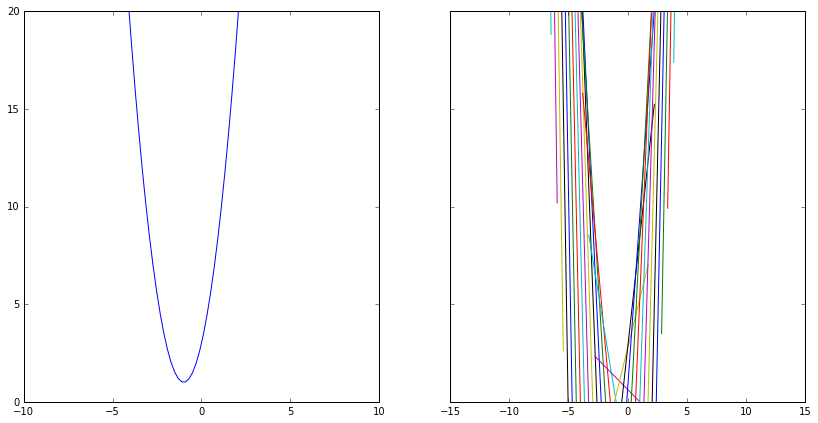

In [20]:
plot_derivative(f, fd, xlim=(-10, 10), ylim=(0, 20), n_retas=40)

$$f(x) = \frac{1}{x}$$
$$fd(x, x0) = \frac{2x_0 - x}{x_0^2}$$

In [21]:
f = lambda x: 1 / x
fd = lambda x, x0: (2*x0 - x) / x0**2

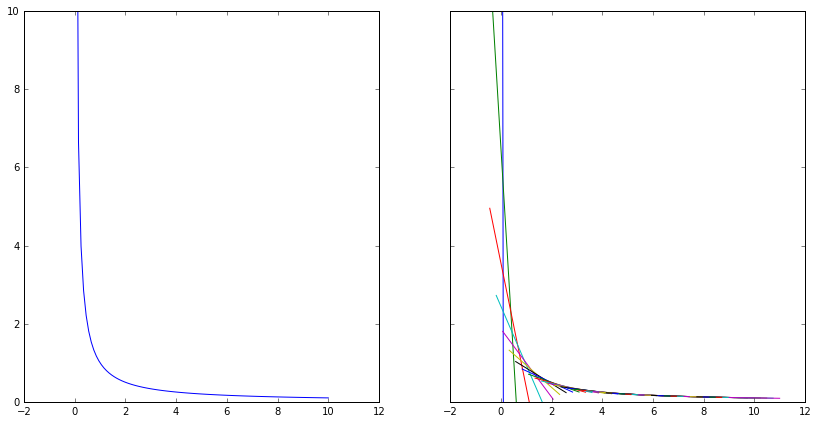

In [25]:
plot_derivative(f, fd, xlim=(.05, 10), ylim=(0, 10), n_retas=40)

$$f(x) = sen(x)$$
$$fd(x, x0) = sen(x_0) + cos(x_0)(x - x_0)$$

In [80]:
f = lambda x: np.sin(x)
fd = lambda x, x0: np.sin(x0) + np.cos(x0) * (x - x0)

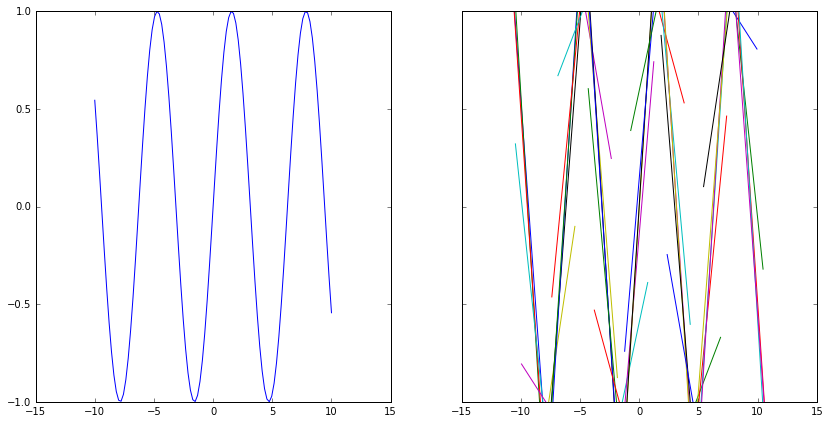

In [81]:
plot_derivative(f, fd, xlim=(-10, 10), ylim=(-1, 1), n_retas=40)

In [82]:
from matplotlib import animation

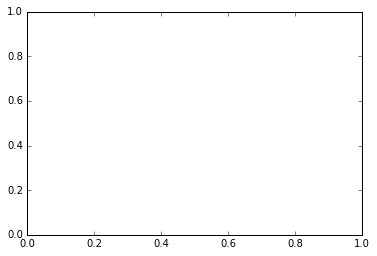

In [142]:
fig, ax = plt.subplots()

ax.set_xlim((0, 1))
ax.set_ylim((0, 1))

x = np.linspace(0, 1, 100)

line, = ax.plot([], [])

In [143]:
def init():
    
    line.set_data([], [])
    
    return (line,)

In [147]:
def animate(x0):
    
    x_ = np.linspace(x0 + .1, x0 + .2, 20)
    y = fd(x_, x0 + .1)
    line.set_data(x_, y)
    return (line, )

In [148]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=20, interval = 200, blit=True)

In [ ]:
HTML(anim.to_html5_video()) ## ::::(((((((((((((((((((((((((((((((quebrando :((((((())))))))))))))))))))))))))))))))))))))